# Neural networks 101
In this notebook you will implement a simple neural network. We'll implement the forward-pass, backpropagation and analyse the effects of different loss functions, activation functions, and architectures. We assume that you are already familiar with backpropation. If not, please refer to the section below. Also [Andrej Karpathy] (http://cs.stanford.edu/people/karpathy/) or [Michal Nielsen] (http://neuralnetworksanddeeplearning.com/chap2.html) has written good descriptions of backprob.

# Backpropagation explained
At first backpropagation in a neural network may seem very complicated. However it can be decomposed into smaller self-contained problems by mechanically applying the chain-rule. This is the method used by all major neural network libraries (Torch, Caffe, Theano, deeppy), and the one we will study here.

Recall that a neural network (parameterized by weights W) predicts a target given an input x i.e. $y = p(y|x,W)$. Training a neural network then corresponds to changing the weights W such that the error $E$ between the predicted targets $y$ and the true targets $t$ is minimized. Here E is usually defined as either:

1. $E = \frac{1}{2} \sum^{K}_{k=1}(y_k-t_k)^2$ For regression problems (Mean Squared Error)
2. $E = -\sum^{K}_{k=1}t_k \log y_k$ For classification problems (Cross Entropy Error)

Neural Networks are usually trained using gradient descent. Here we update $W_{ij}$ by going in the negative direction of $\frac{\partial E}{\partial w_{ji}}$ with $\alpha$ determining the step size. 

$W_{ij} = W_{ij} - \alpha\frac{\partial E}{\partial w_{ji}}$.

Backpropagation is simply an effective way to calculate the exact gradient of E w.r.t to all the weights in the network.


### Backpropagation Notation
Let's start with a small toy network to get hold of the notation.

<img src="./FFNcasper.png" alt="The network that you are to implement." width="500">

We use the following notation:

 * $z^{(l)}$ is the input to a layer $l$
 * $z^{(l+1)}$ is the output of layer $l$
 * $t_j,...,t_k$  true targets
 * $y_j,...,y_k$ predicted targets
 * $h(\cdot)$ Nonlinear activation function (sigmoid, tanh, ReLU etc)
 
We define $z^{(0)} = x$.


#### Forward Pass


In the forward pass all the activations $z^{(l)}_k$ are calculated "bottom up". Especially note that the output to the $l$'th layer can be calculated using the output of the ($l-1$)'th layer. 

$$
\begin{align}
z^{(l+1)} &=  f (z^{(l)}, w^l) \\
\end{align}
$$

Hence a layer is just a simple function parameterized by $w$ performing some transformation on its output. **Note that we define weigths and nonlinearities as separate layers which differ from the conventional textbook approach. However this have the advantage of having an almost one-to-one mapping between theory and implementation.**

The forward pass for common neural network layers:
 * Linear layer: $z^{(l+1)} =  z^{(l)}w^l + b^{l}$ 
 * Sigmoid layer: $z^{(l+1)} =  \sigma (z^{(l)} )$ 
 * Softmax layer: $z^{(l+1)} =  \frac{exp(z^{(l)})}{\sum_j exp(z^{(l)}_j)}$ 


#### Calculate the Error

The goal of backpropation is to calculate $\frac{\partial E}{\partial w}$ and $\frac{\partial E}{\partial b}$ for all parameters in the network. To calculate the loss function well simply plug in the output of the network into the loss function which "measures" the difference between the true and predicited targets. Note that this is always just a single number!

$$
\begin{align}
E = f(z^{(L)},t), \text{  }   E \in \mathbb{R}
\end{align}
$$

Where $L$ denotes the last layer of the network and $f(\cdot)$ can be any differentiable function calculating the difference between true and predicted targets. 

#### Backpropagate the Error

Backpropagations is an algorithm to calculate the gradient error w.r.t. the weights $\frac{\partial E}{\partial w}$. This can be done by calculating the loss/error of the neural network using the activations from the forward pass, and "backpropagate" this error through the network going "top down". Without further introduction we will make the following usefull defintion:

$$ 
\delta_k^{(l)} \equiv \frac{\partial E}{\partial z_k^{l}} 
$$

Intuitively this describes the error at the k'th unit in the l'th layer. This is known as the delta-message or the error-message at the k'th neuron in layer l.

#### Error at output layer L

At the output layer the delta-message is:
$$ 
\delta_k^{(L)} = \frac{\partial E}{\partial z_k^{L}} 
$$
which can be computed using the loss funtion. This is simply the error function differentiated w.r.t to the output of the network. As above we will vectorize this equation to calculate the error for all neurons in the L'th layer

$$ 
\delta^{(L)} = \bigtriangledown_{z^L} E
$$

Where $\bigtriangledown_a E$ means: partial derivative of E w.r.t to all elements in $z^L$.

#### Error in the l'th layer

The error $\delta^l$ in each layer can be calculated using the error $\delta^{l+1}$ in the layer above:

$$ 
\delta^{(l)} = \frac{\partial E}{\partial z^{l}} = \frac{\partial E}{\partial z^{l+1}}\frac{\partial z^{l+1}}{\partial z^{l}} = \delta^{l+1}\frac{\partial z^{l+1}}{\partial z^{l}}^T 
$$

In plain english a layers error-message is the error-message from the layer above multiplied with the layers output differentiated w.r.t its input.

The backward pass for common neural network layers:
 * Linear layer: $\delta^{(l)} =  \frac{\partial E}{\partial z^{l+1}}\frac{\partial z^{l+1}}{\partial z^l} = \frac{\partial (z^{(l)}w^{l+1} + b^{l+1})}{\partial z^l} = \delta^{(l+1)}w^{l} $
 
 * Sigmoid layer: $\delta^{(l)} =  \frac{\partial E}{\partial z^{l+1}}\frac{\partial z^{l+1}}{\partial z^l} = \frac{\partial (\sigma(z^{l+1}))}{\partial z^l} = \delta^{(l+1)}\odot \sigma'(z^{l}) $

Where $\odot$ is the hadamard vector product i.e. element wise multiplication. 

This important results states that we can calculate all the error-messages in the network by starting at the topmost layer and "backpropagate" the errors through the network.


#### Gradients w.r.t parameters

Using these errors calculated at each layer partial derivatives w.r.t the weights are:

$$
\frac{\partial E}{\partial w^{(l)}_{jk}} = \frac{\partial E}{\partial z^{l+1}} \frac{\partial z^{l+1}}{\partial  w^{l}_{ik}} = \frac{\partial z^{l+1}_k}{\partial  w^{l}_{ik}} \delta^{l+1}_k 
$$

and for the bias

$$
\frac{\partial E}{\partial b^{(l)}_{k}} = \frac{\partial E}{\partial z^{l+1}} \frac{\partial z^{l+1}}{\partial  b^{l}_{k}} = \frac{\partial z^{l+1}_k}{\partial  b^{l}_{k}} \delta^{l+1}_k 
$$

#### Neural networks as layers - key points
By viewing neural networks as a number og layers(actually functions) stacked on top of each other allows us to consider each layer as a self-contained building block used to construct neural networks. For each layer we must be able to calculate/implement three things:

 * **Forward Pass** - Calculate output given the output from the layer below: $z^{(l+1)} =  f (z^{(l)}, w^l)$
 * **Backward Pass** - Calculate error message given the delta message from the layer above: $\delta^{(l)} = \delta^{l+1}\frac{\partial z^{l+1}}{\partial z^{l}}^T$. 
 * **Update parameters**: If the layer has any paramemters we need to define a method to update these i.e. $\frac{\partial E}{\partial w^{(l)}_{jk}}  = \frac{\partial z^{l+1}_k}{\partial  w^{l}_{ik}} \delta^{l+1}_k$ and $\frac{\partial E}{\partial b^{(l)}_{k}} =\frac{\partial z^{l+1}_k}{\partial  b^{l}_{k}} \delta^{l+1}_k $


<img src="./layer.png" alt="Layers as self-contained units" width="200">


# Summary

All the steps have been vizualized for a two-hidden-layer network i the figure below:


<img src="./notation.png" alt="The network that you are to implement." width="700">

Backprob step-by-step:
 * ** Forward Pass: ** Recursively calculate the activations of all layer "bottom up" using the activations of the layer below: $z^{(l+1)} =  f (z^{(l)}, w^l)$. Initialize with $z^{(0)} = x$
 * ** Backward Pass: ** Recursively calculate the error-messages of all layers "top down" using the delta-messages from the layer above: $\delta^{(l)} = \delta^{l+1}\frac{\partial z^{l+1}}{\partial z^{l}}^T$. Initalize with $\delta_k^{(L)} = \frac{\partial E}{\partial z_k^{L}}$
 * ** Update Parameters: ** Update the parameters of all layers using the activations and the delta-messages i.e. $\frac{\partial E}{\partial w^{(l)}_{jk}}  = \frac{\partial z^{l+1}_k}{\partial  w^{l}_{ik}} \delta^{l+1}_k$ and $\frac{\partial E}{\partial b^{(l)}_{k}} =\frac{\partial z^{l+1}_k}{\partial  b^{l}_{k}} \delta^{l+1}_k $

 
The backprob algorithm is fairly complicated and it might take several tries to fully grasp whats going on. However, using the above equations we can implement a working neural network which is the good way to fully understand whats going on. we have put the proofs of the equations for optional reading below.


###Backprob deriviation

To prove that $\delta_k^{(l)}$ can  be calculated using $\delta_k^{(l+1)}$
$$
\begin{eqnarray}
  \delta^l_j & = & \frac{\partial E}{\partial z^l_j} \\
  & = & \sum_k \frac{\partial E}{\partial z^{l+1}_k} \frac{\partial z^{l+1}_k}{\partial z^l_j} \\ 
  & = & \sum_k \frac{\partial z^{l+1}_k}{\partial z^l_j} \delta^{l+1}_k = \frac{\partial z^{l+1}_k}{\partial z^l_k} \delta^{l+1}_k \tiny{\blacksquare} 
\end{eqnarray}
$$

To calculate the gradients of the weights and bias first note that in any layer of the network we have 

$$ \frac{\partial z^{l}_k}{\partial w^{l}_{ik}} = \frac{\partial \sum_j w^{(l)}_{ij}z^{(l-1)}_j + b^{(l)}_j }{\partial w^{(l)}_{ik}} = z^{(l-1)}_k $$

$$ \frac{\partial z^{l}_k}{\partial b^{l}_k} = \frac{\partial \sum_j w^{(l)}_{ij}z^{(l-1)}_j + b^{(l)}_j }{\partial b^{(l)}_k} = 1 $$

To calculate the gradient of the cost funtion of a parameter in the l'th layer well use the chain rule:

$$ \frac{\partial E}{\partial w^{l}_{ik}} = \frac{\partial E}{\partial z^{l+1}_k} \frac{\partial z^{l+1}_k}{\partial  w^{l}_{ik}} = \frac{\partial z^{l}_k}{\partial  w^{l}_{ik}}\delta^{l+1}_k\tiny{\blacksquare}$$

$$ \frac{\partial E}{\partial b^{l}_k} = \frac{\partial E}{\partial z^{l+1}_k} \frac{\partial z^{l+1}_k}{\partial  b^{l}_k} = \frac{\partial z^{l+1}_k}{\partial  b^{l}_k}\delta^{l+1}_k \tiny{\blacksquare}$$

Where we used the definition $\delta^{l}_k \equiv \frac{\partial E}{\partial z_k^{l}}$

# MNIST dataset
The MNIST dataset consists of 70,000 images of handwritten digits from 0-9. The dataset is split into a 50,000 images training set, 10,000 images validation set and 10,000 images test set. The images are 28x28 pixels, where each pixel represents a normalised value between 0-255 (0=black and 255=white).

First let's load the MNIST dataset and plot a few examples:

In [1]:
import numpy as np # Scientific library for numerical programming.
import matplotlib.pyplot as plt # Plotting library.
import matplotlib
%matplotlib inline

In [6]:
def onehot(t, num_classes):
    out = np.zeros((t.shape[0], num_classes))
    for row, col in enumerate(t):
        out[row, col] = 1
    return out

data = np.load('mnist.npz')
num_classes = 10
x_train = data['X_train'][:2000].astype('float32')
targets_train = data['y_train'][:2000]
targets_train = onehot(targets_train, num_classes)

x_valid = data['X_valid'][:500].astype('float32')
targets_valid = data['y_valid'][:500]
targets_valid = onehot(targets_valid, num_classes)

x_test = data['X_test'][:500].astype('float32')
targets_test = data['y_test'][:500]
targets_test = onehot(targets_test, num_classes)


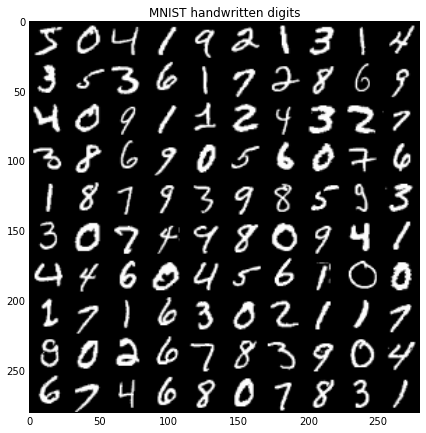

In [14]:
idx = 0
canvas = np.zeros((28*10, 10*28))
for i in range(10):
    for j in range(10):
        canvas[i*28:(i+1)*28, j*28:(j+1)*28] = x_train[idx].reshape((28, 28))
        idx += 1
plt.figure(figsize=(7, 7))
plt.imshow(canvas, cmap='gray')
plt.title('MNIST handwritten digits')
plt.show()

The input data is a *#samples* by 784 $(28^2)$ matrix and the targets are a *#samples* by 10 matrix. The targets are one-of-k encoded. We represent the correct label for each sample with a #classes dimensional vector with a 1 at the index corresponding to the correct class.

As example we plot the label of the 10 first digits from the training set. You can verify that these labels match with the first 10 digits in the first row in the image above. One-of-k encoding should typically be used when you have categorical targets. 

In [15]:
print "One-of-k" + " "*34  + "| Label"
print "-"*50
for i in range(10):
   print targets_train[i], "|",  targets_train[i].argmax(axis=-1)

One-of-k                                  | Label
--------------------------------------------------
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.] | 5
[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.] | 0
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.] | 4
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.] | 1
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.] | 9
[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.] | 2
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.] | 1
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.] | 3
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.] | 1
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.] | 4


In this notebook we are going to apply two modeling approaches to the MNIST dataset:
1. Supervised classifier where the network inputs $x_i,...,x_n$ ($n=28x28=784$) are the image from the training_set and the output $y_j,...,y_k$ ($k=10$) is the multinomial probability an image being part of a class defined by the targets_train set.
2. Deep autoencoder where we are finding a good internal representation $y_j,...,y_k$ of an image $x_i,...,x_n$, by comparing it to a reconstruction $\hat{x}_i,...,\hat{x}_n$. 

#Writing a feed-forward neural network

In this exercise we will implement a neural network using a layerwise modular approach. For generality we will separate the linear weights and the nonlinearities into separate layers.

The key idea is to realize that a layer should be able to 
  * Calculate its outout given the input from the layer below, 
  * Calculate a $\delta$-message given the $\delta$-message from the layer above
  * Update its parameters (if any) using the $\delta$-message from the layer above

We will call the input to all layers for $z^l$ and the output from all layers for $z^{l+1}$. 

All code should be implemented using the matrix-notation versions of the equations presented above. This makes your code 1) Easier to read, 2) A lot faster since it will use highly optimized linear algebra libraries on the computer.

In the code examples we'll use the following notation:

 * $x$ : batchsize x numInputs   (inputs)
 * $W^0$ : numInputs x numHiddenUnits (input to hidden weights)
 * $b^0$ : [1 x numHiddenUnits] (hidden units biases)
 * $W^2$ : [numHiddenUnits x NumOutputs] (hidden units to output)
 * $b^2$ : [1 x numOutputUnits]  (output unit biases)
 
In matrix notation the Forward pass can be written as
$$
\begin{align}
    z^{(0)} &= = x \\
    z^{(1)} &= z^{(0)}W^{(0)} + b^{(0)}  \\
    z^{(2)} &= \tanh(z^{(2)}) \\
    z^{(3)} &= z^{(2)}W^{(2)} + b^{(2)} \\
    y &= softmax(z^{(3)})
\end{align}
$$
We can then define the forward pass in a neural network with tanh activation and softmax output in a few lines of python code 

```PYTHON
import numpy as np
z0 = x
z1 = np.dot(z0, W_0) + b_0  # b_0 is broadcasted
z2 = np.tanh(z2)
z3 = np.dot(z2, W_2) + b_2  # b_2 is broadcasted
# softmax z2 to get the output (softmax is explained later)
exp_z3 = np.exp(z3)
y = exp_z3 / exp_z3.sum(axis=1, keepdims=True)

```

**You should confirm that the shape of** `y` ** is [batchsize x numClasses].** 

The code snippet uses [numpy broadcasting](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) please make sure that you understand numpy broadcasting. If you don't you should solve the exercise below.

In [20]:
# fun with broadcasting. Divide each element in row 1 of x with 1, each element in row 2 with 2 etc. This 
# You may find numpy reshape and numpy arange and x.shape usefull. This should be one or two lines of code and no 
# for loops
x = np.ones((3, 5))


# correct output
# [[ 1.          1.          1.          1.          1.        ]
#  [ 0.5         0.5         0.5         0.5         0.5       ]
#  [ 0.33333333  0.33333333  0.33333333  0.33333333  0.33333333]]

## Writing a linear layer
A linear layer takes an input $z$ and makes a linear transformation to calculate the output $z^{l+1}=w^{l} z^{l}+b^{l}$. 

The $\delta$-message is

$$
    \delta^{l} = \frac{\partial E}{\partial z^{l}} =  \frac{\partial E}{\partial z^{l+1}} \frac{\partial z^{l+1}}{\partial z^{l}} = w^{(l) T} \delta^{l+1}
$$

Lastly we note that we also need to implement the the update of the weights. This is simply done by calculating the gradient for all parameters (recall that $\frac{\partial E}{\partial w^{l}} = z^{l} \delta^{l+1}$ )


#####Exercise 1: Continue writing the linear layer, following the template given below.

In [5]:
class LinearLayer():
    def __init__(self, num_inputs, num_units, scale=0.01):
        self.num_units = num_units
        self.num_inputs = num_inputs
        self.W = np.random.random((num_inputs, num_units)) * scale
        self.b = np.zeros(num_units)

    def __str__(self): 
        return "LinearLayer(%i, %i)" % (self.num_inputs, self.num_units)

    def fprop(self, x, *args):
        # TODO: Write the code for a linear forward-pass and return this value.
        raise NotImplemented()
        self.x = x
        self.z = ????
        return self.z 
        
    def bprop(self, delta_in):
        # TODO: Write the code for calculating delta and return this value.
        raise NotImplemented()
        x_t = np.transpose(self.x)
        self.grad_W = ???
        self.grad_b = ???
        W_T = np.transpose(self.W)
        self.delta_out = ????
        return self.delta_out
    
    def update_params(self, lr):
        self.W = self.W - self.grad_W*lr
        self.b = self.b - self.grad_b*lr

## Writing activation function layers
The forward propagation of the activation function layer is applied as a transformation of the output of a subsequent linear layer, $z^{l+1}=h(z^{l})$, where $z=z_j,...,z_k$ is denoted the output vector of the layer. 

There exists multiple activation functions, where the most common are:
- linear function $f(a) = a$,
- sigmoid function $\sigma (a)=\frac{1}{1+exp(-a)}$,
- tanh function $tanh(a)=\frac{exp(a)-exp(-a)}{exp(a)+exp(-a)}$,
- ReLU function $f(a)=max(0,a)$,
- softplus function $f(a)=ln(1+exp(a))$.

For a feedforward network the ReLU activation function is often a good choice.

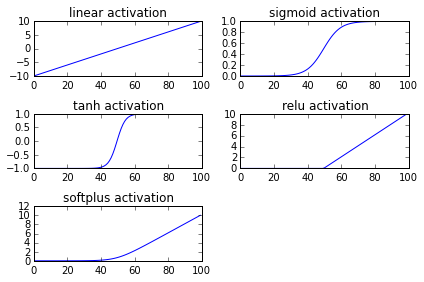

In [6]:
def linear(x):
    return x

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return (np.exp(x)-np.exp(-x)) / (np.exp(x)+np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def softplus(x):
    return np.log(np.exp(x) + 1)

x = np.linspace(-10,10,100)

plt.subplot(321)
plt.plot(linear(x))
plt.title('linear activation')
plt.subplot(322)
plt.plot(sigmoid(x))
plt.title('sigmoid activation')
plt.subplot(323)
plt.plot(tanh(x))
plt.title('tanh activation')
plt.subplot(324)
plt.plot(relu(x))
plt.title('relu activation')
plt.subplot(325)
plt.plot(softplus(x))
plt.title('softplus activation')
plt.tight_layout()
plt.show()

#####Exercise 2: Continue writing the activation layer, following the template given below.
As a starter we'll show you how to solve the sigmoid activation function. The forward pass is already given above:

$$f(x) = \frac{1}{1 + exp(-x)}$$

and in Python

```PYTHON
1.0 / (1.0 + np.exp(-x))
```

For the backward pass we need to find the derivative of the sigmoid w.r.t to the input:

$$\frac{\partial f}{\partial x} = \frac{\partial}{\partial x} (1+exp(-x))^{-1} = (-1)(1+exp(-x))^{-2}(-exp(-x)) = (1+exp(-x))^{-2}exp(-x) = \frac{1}{1+exp(-x)} \frac{exp(-x)}{1+exp(-x)} = $$
$$ \frac{1}{1+exp(-x)} \frac{(1+exp(-x))-1}{1+exp(-x)} = \frac{1}{1+exp(-x)} \frac{1+exp(-x)}{1+exp(-x)} \frac{-1}{1+exp(-x)} = f(x)(1-f(x))$$

This shows that the gradient of the sigmoid can be calculated from the output of the sigmoid layer. When implementing the sigmoid we want save the output from the forward pass and use it when doing the backward pass. 

*When you have implemented the ReLU function you can go to the next section. If you have extra time you can implement the other activation functions*

In [23]:
class SigmoidActivationLayer():
    def __str__(self): 
        return "Sigmoid()"
    
    def fprop(self, x, train=True):
        fx = 1.0 / (1.0 + np.exp(-x)) # calculate sigmoid
        self.fx = fx  # cache output for use during backward pass 
        return fx  

    def bprop(self, delta_in):
        return self.fx*(1-self.fx)

    def update_params(self, lr):
        pass  # no params to update

class ReluActivationLayer():
    def __str__(self): 
        return "ReLU()"

    def fprop(self, x, train=True):
        raise NotImplemented()

    def bprop(self, delta_in):
        raise NotImplemented()
        
    def update_params(self, lr):
        pass

class TanhActivationLayer():
    def __str__(self): 
        return "Tanh()"
    
    def fprop(self, x, train=True):
        raise NotImplemented()

    def bprop(self, delta_in):
        raise NotImplemented()

    def update_params(self, lr):
        pass
    
class SoftplusActivationLayer():
    def __str__(self):
        return "Softplus()"
    
    def fprop(self, x, train=True):
        raise NotImplemented()

    def bprop(self, delta_in):
        raise NotImplemented()
        
    def update_params(self, lr):
        pass

##Writing the output activation function
In a classifier the output of the network must be a $k$-dimensional vector of real values that sums to 1. Here we introduce the softmax activation function, which is a generalization of the logistic sigmoid function:
$\sigma (z_j) = \frac{exp(z_j)}{\sum_k exp(z_k)}$.

####Exercise 3: Continue writing the softmax activation layer, following the template given below.
*Hints*: 

* The forward pass can be implemented in a few lines of code without for-loops. You'll need to use broadcasting when dividing by the denominator (i.e the normalizing constant)
* The backward pass is very simple. Consider what happens to the sum in the denominator when you take the gradient w.r.t $z_j$.

In [1]:
class SoftmaxActivationLayer():
    def __str__(self): 
        return "Softmax()"
    
    def fprop(self, x, train=True):
        raise NotImplemented()

    def bprop(self, delta_in):
        # We'll derive the gradient of CrossEntropyLoss(softmax(x))
        # in CrossEntropyLoss. softmax backprob should therefore return
        # identity. Cf. Bishop p. 241->...
        raise NotImplemented()

    def update_params(self, lr):
        pass

# Loss layers
Loss layers are slightly different because they take both prediction probabilities and true targets as output. Many different loss layers exists. Here we implement squared loss and cross entropy loss. 

1. For regression problems use a linear output and MeanSquaredError loss, $\frac{1}{2} \sum^{K}_{k=1}(y_k-t_k)^2$.
2. For classification problems use a SoftmaxLayer as output and CrossEntropyLoss, $-\sum^{K}_{k=1}t_k \log y_k$.


#####Exercise 4: Continue writing the mean squared loss and cross entropy loss functions.

In [9]:
class MeanSquaredLoss():
    def __str__(self): 
        return "MeanSquaredLoss()"
    
    def fprop(self, x, t):
        # TODO: Write the code for calculating the error and return this value.
        raise NotImplemented()

    def bprop(self, y, t):
        # TODO: Write the code for calculating derivative of the error and return this value.
        raise NotImplemented()
        
    def update_params(self):
        pass

class CrossEntropyLoss():
    def __str__(self): 
        return "CrossEntropyLoss()"
    
    def fprop(self, x, t):
        # TODO: Write the code for calculating the error and return this value.
        raise NotImplemented()
        
    def bprop(self, y, t):
        # TODO: Write the code for calculating derivative of the error and return this value.
        raise NotImplemented()
        
    def update_params(self):
        pass

#Setting up the model

Because we have implemented the layers with a forward pass (`fprop`) and a backward pass (`bprop`) we only need to setup the layers and connect them.

#####Exercise 5: Write a classifier with one 100 unit linear layers, corresponding relu activation layer,  and a softmax output layer. Use the cross entropy loss as the loss layer.

<img src="./network.png" alt="The network that you are to implement.">

In [10]:
num_samples, num_inputs = x_train.shape
num_hidden_units = 100
num_classes = 10

# TODO: Define each layer in the model here.
l1 = LinearLayer(num_inputs, num_hidden_units) 
l2 = ?????
l3 = ?????
l4 = ?????

LossLayer = CrossEntropyLoss()

def forward(x):
    # TODO: Write the forward pass through each layer. Return the softmax probabilities as the output.
    out1 = l1.fprop(x)
    out2 = l2.fprop(?????)
    ?????
    raise NotImplemented()


def backward(y_probs, targets):
    # TODO: Write the backward propagation of errors.
    delta1 = LossLayer.bprop(???, ???)
    delta2 = l_hid_act2.bprop(???)
    delta3 = ???
    ????
    raise NotImplemented()

def update(learning_rate):
    # TODO: Write the update of each linear layer in the model.
    l_hid_pre1.update_params(????)
    ?????
    raise NotImplemented()

# Writing the training loop

#####Exercise 6: Check whether the above implementations are implemented correctly by running the training loop below.

In [ ]:
from confusionmatrix import ConfusionMatrix
batch_size = 100
num_epochs = 100
learning_rate = 0.1
num_samples = x_train.shape[0]
num_batches = num_samples // batch_size


train_acc, train_loss = [], []
valid_acc, valid_loss = [], []
test_acc, test_loss = [], []
for epoch in range(num_epochs):
    #Forward->Backprob->Update params
    for i in range(num_batches):
        idx = range(i*batch_size, (i+1)*batch_size)
        x_batch = x_train[idx]
        target_batch = targets_train[idx]
        #FORWARD PASS
        y_probs = ?????
        batch_loss_cur = LossLayer.fprop(y_probs, target_batch) 
        #For large models you likely wan't to plot this to monitor the convergence of the model
        batch_loss += [batch_loss_cur]
        #BACKWARD PASS
        ????
        
        #UPDATE PARAMETERS
        ???
        
    #A lot of bookkeeping to track of performance - 
    confusion_train = ConfusionMatrix(num_classes)
    #confusion_valid = ??
    #confusion_test =??
    
    y_train_probs = forward(x_train)
    train_loss_cur = LossLayer.fprop(y_train_probs, targets_train)
    confusion_train.batch_add(targets_train.argmax(-1), y_train_probs.argmax(-1))
    train_acc_cur = confusion_train.accuracy()
    train_acc += [train_acc_cur]
    train_loss += [train_loss_cur.mean()]

    #Add tracking of validation and test performance below
    valid_acc_cur = 0.0
    
    print "Epoch %i : Train Loss %e , Train acc %f,  Valid acc %f " \
    % (epoch+1, np.mean(train_loss_cur), train_acc_cur, valid_acc_cur)


In [ ]:
#Plot the performance - add the validation and test performacne when you hae implementet these
print confusion
plt.plot(range(num_epochs), train_acc)
plt.title('Training Accuracy on MNIST')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

plt.plot(train_loss)
plt.title('Training Losses on MNIST')
plt.xlabel('Updates')
plt.ylabel('Loss')
plt.show()

To avoid overfitting we introduce the use of test and validation set. These are not trained upon and will thereby provide an impression on the model generalization while training.

#####Exercise 7: In the training loop above, only the training set is evaluated. Rewrite the training loop above to include the test and the validation set and plot the acc/losses for train/valid/test data.

With low learning rates the improvements will be linear. With higher learning rates the progression will be more exponential. With a higher learning rate, the loss will decay faster, but the model may get stuck at a worse state, since the training is not able to reach near a minima in the error space.

#####Exercise 8: Experiment with different learning rates to increase the accuracy of the model.

#####Exercise 9: Change the parameters of training. Can you make the model overfit?

##Writing a dropout layer
Dropout is a way of preventing neural networks to overfit, by setting a random number of unit activations to zero in each layer given a probability. So if a random number is greater than the dropout probability, the activation of the unit is zero. For more info, please have a look at this <a href=https://youtu.be/UcKPdAM8cnI>video</a>.

#####Excercise 10: Continue writing the dropout layer, following the template given below.

In [ ]:
class DropoutLayer():
    def __str__(self): 
        return "Dropout(%f)" % self.p
    
    def __init__(self, p=0.5):
        self.p = p

    def fprop(self, x, train=True):
        if train:
            # TODO: Write the code in the if-statement.
            raise NotImplemented()
        else:
            return x

    def bprop(self, delta_in):
        delta_out = delta_in*self.a
        return delta_out

    def update_params(self, lr):
        pass

#####Exercise 11: Add dropout layers to the architecture from exercise 11, and evaluate the progression of the training. Is the model overfitting?

# Writing a feed-forward neural network in Theano
Theano is a Python library enabling the optimization and evaluation of mathematical expressions at decent speeds, especially by utilizing the GPU. One of the most helpful features in Theano is the ability to automatically calculate <a href="http://deeplearning.net/software/theano/tutorial/gradients.html">gradients</a>. This will be obvious in the following example. Please visit the <a href='http://deeplearning.net/software/theano/introduction.html'>Theano tutorial</a> for an in-debt walkthrough. 

In [4]:
import theano
import theano.tensor as T # Theano subpackage where many useful symbols are included.

<a href='http://lasagne.readthedocs.org/en/latest/'>Lasagne</a> is a Python library build on Theano to ease the implementation of deep learning. Many of the frequently used layers are already implemented together with the activation functions, loss functions and optimization algorithms. 

In [5]:
import lasagne
import numpy as np
from lasagne.layers import InputLayer, DenseLayer, get_output, get_all_params
from lasagne.init import Normal, Constant
from lasagne.nonlinearities import rectify, softmax

In lasagne a basic feed-forward neural network consists of an input layer and a dense layer. The dense layer contains both the linear and the activation layer. Following you will see how simple it is to define a network similar to the one above.

In [6]:
batch_size = 100
num_class = 10
learning_rate = 0.1

data = np.load('mnist.npz')
num_classes = 10
x_train = data['X_train'].astype('float32')
targets_train = data['y_train'].astype('int32')

x_valid = data['X_valid'].astype('float32')
targets_valid = data['y_valid'].astype('int32')

x_test = data['X_test'].astype('float32')
targets_test = data['y_test'].astype('int32')


In [8]:
l_in = InputLayer(shape=(batch_size, x_train.shape[1]))
l_hid = DenseLayer(incoming=l_in, num_units=500, nonlinearity=rectify)
l_out = DenseLayer(incoming=l_hid, num_units=10, nonlinearity=softmax)

Now we will import the cross entropy loss and the stochastic gradient descent update function.

In [9]:
from lasagne.objectives import categorical_crossentropy
from lasagne.updates import sgd

We can now define the loss and update functions as Theano expressions. In order to do so we must define the <a href='http://deeplearning.net/software/theano/library/tensor/basic.html'>symbolic variables</a> that will take on the values of a batch during training.

In [10]:
sym_x = T.matrix('sym_x') # a symbolic variable taking on the value of a input batch.
sym_t = T.ivector('sym_t') # a symbolic variable taking on the value of the target batch.

# Get network output
train_out = lasagne.layers.get_output(l_out, sym_x, deterministic=False)
eval_out = lasagne.layers.get_output(l_out, sym_x, deterministic=True)


# Get list of all trainable parameters in the network.
all_params = lasagne.layers.get_all_params(l_out, trainable=True)

cost = T.nnet.categorical_crossentropy(train_out+1e-8, sym_t).mean()
# Let Theano do its magic and get all the gradients we need for training
all_grads = T.grad(cost, all_params)


# Set the update function for parameters 
# you might wan't to experiment with more advanded update schemes like rmsprob, adadelta etc.
updates = lasagne.updates.sgd(all_grads, all_params, learning_rate=learning_rate)




f_eval = theano.function([sym_x],
                     eval_out, on_unused_input='warn')

f_train = theano.function([sym_x, sym_t],
                          [cost],
                          updates=updates, on_unused_input='warn')


Now we can use the power of Theano to implement the train, validation, and test functions.

In [11]:
    #Test the forward pass
    x = np.random.normal(0,1, (45, 28*28)).astype('float32') #dummy data
    
    model = lasagne.layers.get_output(l_out, sym_x)
    out = model.eval({sym_x:x}) #this could also include mask etc if used
    print("l_out", out.shape)

('l_out', (45, 10))


Implementing the training loop is done simply by the following code snippet.

In [ ]:
from confusionmatrix import ConfusionMatrix
batch_size = 100
num_epochs = 10
learning_rate = 0.1
num_samples_train = x_train.shape[0]
num_batches_train = num_samples_train // batch_size
num_samples_valid = x_valid.shape[0]
num_batches_valid = num_samples_valid // batch_size

train_acc, train_loss = [], []
valid_acc, valid_loss = [], []
test_acc, test_loss = [], []
cur_loss = 0
loss = []
for epoch in range(num_epochs):
    #Forward->Backprob->Update params
    cur_loss = 0
    for i in range(num_batches_train):
        idx = range(i*batch_size, (i+1)*batch_size)
        x_batch = x_train[idx]
        target_batch = targets_train[idx]    
        batch_loss = f_train(x_batch,target_batch) #this will do the complete backprob pass
        cur_loss += batch_loss[0]
    loss += [cur_loss/batch_size]
    
    confusion_valid = ConfusionMatrix(num_classes)
    confusion_train = ConfusionMatrix(num_classes)

    for i in range(num_batches_train):
        idx = range(i*batch_size, (i+1)*batch_size)
        x_batch = x_train[idx]
        targets_batch = targets_train[idx]
        net_out = f_eval(x_batch)   
        preds = np.argmax(net_out, axis=-1) 
        confusion_train.batch_add(targets_batch, preds)

    confusion_valid = ConfusionMatrix(num_classes)
    for i in range(num_batches_valid):
        idx = range(i*batch_size, (i+1)*batch_size)
        x_batch = x_valid[idx]
        targets_batch = targets_valid[idx]
        net_out = f_eval(x_batch)   
        preds = np.argmax(net_out, axis=-1) 
        
        confusion_valid.batch_add(targets_batch, preds)
    
    train_acc_cur = confusion_train.accuracy()
    valid_acc_cur = confusion_valid.accuracy()

    
    print "Epoch %i : Train Loss %e , Train acc %f,  Valid acc %f " \
    % (epoch+1, loss[-1], train_acc_cur, valid_acc_cur)

#####Exercise 12: Implement the training loop from exercise 7 in Theano and lasagne.

In [ ]:
class FeedforwardNetwork():
    def __init__(self):
        self.layers = []
        
    def __str__(self):
        if len(self.layers) > 0:
            s = "input "
            for l in self.layers:
                s += " --> " + str(l) 
            s += " --> output"
        else:
            s = "No Layers"
        return s
        
    def add(self, layer):
        self.layers += [layer]

    def forward(self, x, train=True):
        for layer in self.layers:
            x = layer.fprop(x, train=train)
        return x

    def backward(self, delta):
        for layer in reversed(self.layers):
            delta = layer.bprop(delta)
    
    def update(self, lr):
        for layer in self.layers:
            layer.update_params(lr)

In [ ]:
ffn = FeedforwardNetwork()

ffn.add(LinearLayer(num_inputs, num_hidden_units))
ffn.add(ReluActivationLayer())
ffn.add(LinearLayer(num_hidden_units, num_classes))
ffn.add(SoftmaxActivationLayer())
losslayer = CrossEntropyLoss()

print "Network"
print ffn
print "Loss", losslayer
print ""


acc = []
for epoch in range(num_epochs):
    confusion = ConfusionMatrix(num_classes)
    for i in range(num_batches):
        idx = range(i*batch_size, (i+1)*batch_size)
        x_batch = x_train[idx]
        target_batch = targets_train[idx]

        y_probs =  ffn.forward(x_batch)
        loss = losslayer.fprop(y_probs, target_batch)
        delta = losslayer.bprop(y_probs, target_batch)
        ffn.backward(delta)
        ffn.update(learning_rate)
        confusion.batch_add(target_batch.argmax(-1), y_probs.argmax(-1))
    curr_acc = confusion.accuracy()
    print "Epoch %i : Loss %f Train acc %f" % (epoch, loss, curr_acc)
    acc += [curr_acc]